<a href="https://colab.research.google.com/github/yasingok/Design/blob/master/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

import os
os.chdir('/content/drive/My Drive/')


In [ ]:
import json
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [ ]:
with open('Colab Notebooks/siparis.json','r') as f:
    data = json.load(f)

In [ ]:
df = pd.DataFrame(data,columns = ['Comment','Brand','Sector'])
len(df)

98342

In [ ]:
filter = df["Comment"] != ""

In [ ]:
filter.value_counts()

In [ ]:
df = df[filter]
len(df)

98342

In [ ]:
df = df.dropna() 
len(df)

98342

Konu Basliklari


In [ ]:
print(df.Brand.value_counts())
a = df.Brand.value_counts()

Sürat Kargo                  7632
Boyner                       5556
Çiçek Sepeti                 5123
Aras Kargo                   4297
MNG Kargo                    3621
                             ... 
Solingen                        1
Mobile Teknik                   1
Ceptematbaa                     1
Çanta Sayfası (İnstagram)       1
Globalwhiteofficial.com         1
Name: Brand, Length: 3813, dtype: int64


In [ ]:
df["Sector"] = df.Brand.map(lambda sentences: None )

In [ ]:
taşıma_list = ["Aras Kargo","Sürat Kargo","MNG Kargo","Horoz Lojistik","Trendyol Express","UPS Türkiye","hepsiJET","Getir"]
for i in taşıma_list:
    df.Sector[df.Brand == i ] = "Taşıma"

In [ ]:
giyim_list = ["Penti","Boyner","DeFacto","Gratis", "LC Waikiki","FLO Ayakkabı","Bershka"]
for i in giyim_list:
    df.Sector[df.Brand == i ] = "Giyim"

In [ ]:
yemek_list = ["Yemek Sepeti","Domino's Pizza","Protein Market"]
for i in yemek_list:
    df.Sector[df.Brand == i ] = "Yemek"

In [ ]:
teknoloji_list = ["Media Markt"]
for i in teknoloji_list:
    df.Sector[df.Brand == i ] = "Teknoloji"

In [ ]:
ev_esyasi_list = ["Evform","Tekzen","IKEA"]
for i in ev_esyasi_list:
    df.Sector[df.Brand == i ] = "EvEsyasi"

In [ ]:
kitap_list = ["Kitap Seç","Bkm Kitap","D&R"]
for i in kitap_list:
    df.Sector[df.Brand == i ] = "Kitap"

In [ ]:
ticaret_sitesi_list = ["Çiçek Sepeti","N11"]
for i in ticaret_sitesi_list:
    df.Sector[df.Brand == i ] = "ETicaret"

In [ ]:
filter = df["Sector"] != ""
filter.value_counts()

True    98342
Name: Sector, dtype: int64

In [ ]:
df = df[filter]
len(df)

98342

In [ ]:
df1 = df.dropna()
df1.Sector.value_counts()

Taşıma       22101
Giyim        14658
ETicaret      7583
Yemek         2477
Kitap         2475
EvEsyasi      2297
Teknoloji      646
Name: Sector, dtype: int64

Alt Konu Basliklari¶


In [ ]:
konu_list = ["Giyim","Taşıma","Yemek","Teknoloji","Ev Eşyası","Kitap"]
data_kitap = df1.Comment[df.Sector == "Kitap"]
data_giyim = df1.Comment[df.Sector == "Giyim"]
data_tasıma = df1.Comment[df.Sector == "Taşıma"]
data_yemek = df1.Comment[df.Sector == "Yemek"]
data_teknoloji = df1.Comment[df.Sector == "Teknoloji"]
data_esya = df1.Comment[df.Sector == "EvEsyasi"]

In [ ]:
print("Kitap  =>",len(data_kitap)) 
print("Giyim  =>",len(data_giyim)) 
print("Tasima =>",len(data_tasıma))  
print("Yemek =>",len(data_yemek))  
print("Teknoloji =>",len(data_teknoloji))  
print("Esya =>",len(data_esya))

Kitap  => 2475
Giyim  => 14658
Tasima => 22101
Yemek => 2477
Teknoloji => 646
Esya => 2297


In [ ]:
def word_tokenize(sentence):
    acronym_each_dot = r"(?:[a-zğçşöüı]\.){2,}"
    acronym_end_dot = r"\b[a-zğçşöüı]{2,3}\."
    suffixes = r"[a-zğçşöüı]{3,}' ?[a-zğçşöüı]{0,3}"
    numbers = r"\d+[.,:\d]+"
    any_word = r"[a-zğçşöüı]+"
    punctuations = r"[a-zğçşöüı]*[.,!?;:]"
    word_regex = "|".join([acronym_each_dot,acronym_end_dot,suffixes,numbers,any_word,punctuations])
    sentence = re.compile("%s"%word_regex, re.I).findall(sentence)
    return sentence

In [ ]:
def initial_clean(text):
    #text = re.sub("[^a-zA-Z ]", "", text)
    text = text.lower() # lower case text
    #print(text)
    text = nltk.word_tokenize(text)
    return text

In [ ]:
initial_clean('verdiğim')


['verdiğim']

In [ ]:
#!/usr/bin/env python
import re

def deEmoji(text):

    emoji_pattern = re.compile("["
          u"\U0001F600-\U0001F64F"  # emoticons
          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
          u"\U0001F680-\U0001F6FF"  # transport & map symbols
          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            "]+", flags=re.UNICODE)
    return str(emoji_pattern.sub('', text) )# no emoji

In [ ]:

text = "Son aldığım ürün henüz elime ulaşmadı"
initial_clean(text)
['son', 'aldığım', 'ürün', 'henüz', 'elime', 'ulaşmadı']

['son', 'aldığım', 'ürün', 'henüz', 'elime', 'ulaşmadı']

In [ ]:
#Türkçe için stopwords listesi
with open('Colab Notebooks/turkce-stop-words', 'r') as f:
    myList = [line.strip() for line in f]

In [ ]:
def remove_stop_words(text):
    stop_words = myList 
    return [word for word in text if word not in stop_words]

In [ ]:
def apply_all(text):
    return remove_stop_words(initial_clean(deEmoji(text)))

In [ ]:
import time
t1 = time.time()
data_yemek_clean= data_yemek.apply(apply_all) #kirli veri seti ->>>> normalize edilmiş veri seti
t2 = time.time()
print("prerocess ve tokenize için geçen süre", len(data_yemek), "texts:", (t2-t1)/60, "min")

prerocess ve tokenize için geçen süre 2477 texts: 0.04431975285212199 min


In [ ]:
data_yemek_clean = data_yemek_clean.map(lambda values: ' '.join([str(elem) for elem in values]) )


In [ ]:
# Bu satirdan once asagidaki Normalization satirlarini calistir
data_yemek_clean = data_yemek_clean.map(lambda values: Zemberek_lemmatization(values) )

In [ ]:
len(data_yemek_clean)


2477

Normalization

In [ ]:
#https://medium.com/@melikebektas95/zemberek-k%C3%BCt%C3%BCphanesi-ile-t%C3%BCrk%C3%A7e-metinlerde-kelime-k%C3%B6klerinin-bulunmas%C4%B1-6ddd3a875d5f
from typing import List
from jpype import JClass, JString, getDefaultJVMPath, shutdownJVM, startJVM, java

In [ ]:
ZEMBEREK_PATH = r'Colab Notebooks/zemberek-full.jar'
startJVM(getDefaultJVMPath(), '-ea', '-Djava.class.path=%s' % (ZEMBEREK_PATH))

In [ ]:

TurkishMorphology = JClass('zemberek.morphology.TurkishMorphology')
morphology = TurkishMorphology.createWithDefaults()

In [ ]:

kelimeler = 'arabacı ilişkilendiremediklerimiz gözlük gözlem'
def Zemberek_lemmatization(text):
    analysis: java.util.ArrayList = (
        morphology.analyzeAndDisambiguate(text).bestAnalysis()
        )
    #pos: List[str] = []
    stemma: List[str] = []

    for i, analysis in enumerate(analysis, start=1):
        f'\nAnalysis {i}: {analysis}',
        f'\nPrimary POS {i}: {analysis.getPos()}'
        f'\nPrimary POS (Short Form) {i}: {analysis.getPos().shortForm}'

        #pos.append( f'{str(analysis.getLemmas()[0])}')
        stemma.append(f'{str(analysis.getStems()[0])}')
    #print(f'\n Kelime Kökleri: {" ".join(pos)}')
    #print(f'\n Kelime Kökleri: {" ".join(stemma)}')
    return " ".join(stemma)

LDA

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
stop_words = open('Colab Notebooks/turkce-stop-words', 'r',encoding ='utf-8').read().split()
cv = CountVectorizer(max_df=0.5,min_df=5, stop_words=stop_words)
dtm  = cv.fit_transform(data_yemek_clean)

In [ ]:

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=1,random_state=None)

lda_fit  = lda.fit(dtm)

# understanding each topics top 10 common words  
for id_value, value in enumerate(lda_fit.components_):
    print(f"The topic would be {id_value}") 
    print([cv.get_feature_names()[index] for index in value.argsort()   [-50:]])
    print("\n")

The topic would be 0
['10', 'geri', 'çık', 'çalış', 'getir', 'ücret', 'kullan', 'iş', 'numara', 'zaman', '30', 'hizmet', 'ulaş', 'kargo', 'restoran', 'telefon', 'bekle', 'üzeri', 'yaz', 'tl', 'di', 'tarih', 'firma', '2020', 'iste', 'gönder', 'domino', 'şikayet', 'geç', 'müşteri', 'öde', 'ürün', 'yok', 'dakika', 'iade', 'gün', 'söyle', 'saat', 'şube', 'iptal', 'et', 'al', 'pizza', 'para', 'sepet', 'ara', 'ed', 'ol', 'yemek', 'yap']




In [ ]:
# fiyat islem kazan talep kotu menu koy yorum indirim kampanya yogun hata kurye kart
#ucret numara restoran telefon tl   ode iade dakika sube gun iptal para

In [ ]:
word_list: List[str] = []
count = 0
for i in data_yemek:
    if ' para' in i:
        word_list.append(i)
        #print(i+"\n===============================================")
        count = count+1
print("Count = ", count)

Count =  776


In [ ]:
df_model = pd.DataFrame(df1,columns = ["Comment","Brand","Sector","Zamaninda Teslimat","Ödeme","Müşteri Hizmetleri","Kampanya","Doğru Sipariş","İade","Ürün Memnuniyeti"])


len(df_model)

52237

In [ ]:
konu_list = ["Zamaninda Teslimat","Ödeme","Müşteri Hizmetleri","Kampanya","Doğru Sipariş","İade","Ürün Memnuniyeti"]


In [ ]:
for i in konu_list:
    df_model[i] = df_model[i].map(lambda a: 0)

In [ ]:
df_yemek = df_model[df_model.Sector == "Yemek"]


In [ ]:
df_yemek


,Comment,Brand,Sector,Zamaninda Teslimat,Ödeme,Müşteri Hizmetleri,Kampanya,Doğru Sipariş,İade,Ürün Memnuniyeti
60,Saat 01:04 te verdiğim sipariş için tam 32 dak...,Domino's Pizza,Yemek,0,0,0,0,0,0,0
64,Ben Samsun'dayken Yemek Sepeti'nden 3 tane dür...,Yemek Sepeti,Yemek,0,0,0,0,0,0,0
67,Bu akşam saat 22.15 sularında Ankara Eryaman ş...,Yemek Sepeti,Yemek,0,0,0,0,0,0,0
75,Popeyes'den sipariş verdim. 40 dakika sonra Ye...,Yemek Sepeti,Yemek,0,0,0,0,0,0,0
76,Saat 22:13 de Domino's Pizza Gebze mutlukent ş...,Domino's Pizza,Yemek,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
98244,Aynı ilçede olmama rağmen şube ile bayramda he...,Domino's Pizza,Yemek,0,0,0,0,0,0,0
98255,Sepet tutarı integer > =19.99 yerine >19.99 ku...,Domino's Pizza,Yemek,0,0,0,0,0,0,0
98262,Dün Domino's pizzayı aradık 1 saat sonra getir...,Domino's Pizza,Yemek,0,0,0,0,0,0,0
98309,17 Kasım 2019 tarihinde Dominos.com.tr üzerind...,Domino's Pizza,Yemek,0,0,0,0,0,0,0


Yemek

In [ ]:
def check_value(sentence,anahtar):
    for word in anahtar:
        if word in sentence:
            return 1
    return 0

In [ ]:
#"Zamaninda Teslimat","Ödeme","Müşteri Hizmetleri","Kampanya","Doğru Sipariş","İade","Ürün Memnuniyeti"


In [ ]:
anahtar = [" saat"," dakika","gün geçti"] 
df_yemek["Zamaninda Teslimat"] = df_yemek["Comment"].map(lambda sentence: check_value(sentence,anahtar) )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
anahtar = [" para"," tl "," ödeme"," kredi"] 
df_yemek["Ödeme"] = df_yemek["Comment"].map(lambda sentence: check_value(sentence,anahtar) )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
anahtar = ["kampanya","kupon"] 
df_yemek["Kampanya"] = df_yemek["Comment"].map(lambda sentence: check_value(sentence,anahtar) )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
anahtar = ["yanlış"] 
df_yemek["Doğru Sipariş"] = df_yemek["Comment"].map(lambda sentence: check_value(sentence,anahtar) )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:

anahtar = ["para","iade","saat"] 
df_yemek["İade"] = df_yemek["Comment"].map(lambda sentence: check_value(sentence,anahtar) )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:

anahtar = ["sos","sucuk","tavuk"," bol ","peynir","domates","sosis","eksik","malzeme","patates","hamur"] 
df_yemek["Ürün Memnuniyeti"] = df_yemek["Comment"].map(lambda sentence: check_value(sentence,anahtar) )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
anahtar = ["müşteri hizmetleri"] 
df_yemek["Müşteri Hizmetleri"] = df_yemek["Comment"].map(lambda sentence: check_value(sentence,anahtar) )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_yemek_comments_labels = df_yemek[["Zamaninda Teslimat","Ödeme","Müşteri Hizmetleri","Kampanya","Doğru Sipariş","İade","Ürün Memnuniyeti"]]
df_yemek_comments_labels.head()

,Zamaninda Teslimat,Ödeme,Müşteri Hizmetleri,Kampanya,Doğru Sipariş,İade,Ürün Memnuniyeti
60,1,0,0,0,0,0,0
64,0,0,0,0,0,0,1
67,1,0,0,0,0,1,0
75,1,0,0,0,0,0,0
76,1,0,0,1,0,1,0


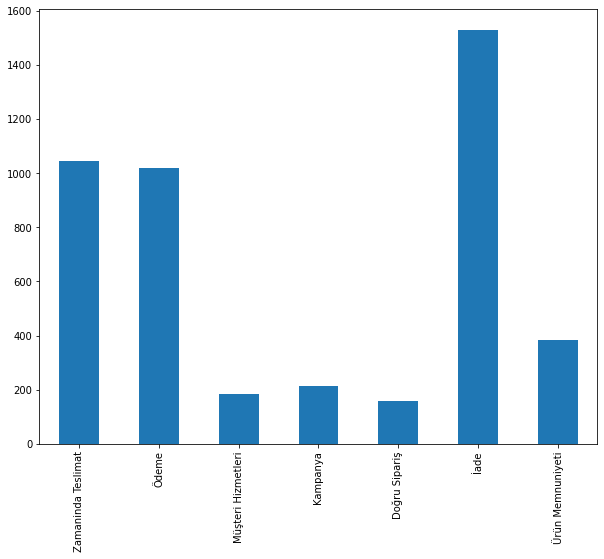

In [ ]:
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

df_yemek_comments_labels.sum(axis=0).plot.bar()

Multi-lable Text Classification Model with Single Output Layer¶


In [ ]:

from numpy import loadtxt,array
from keras.models import Sequential
import seaborn as sn
from matplotlib import pyplot
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

X = []
sentences = list(df_yemek["Comment"])
for sen in sentences:
    X.append(sen)

y = df_yemek_comments_labels.values

In [ ]:
len(y)


2477

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(7, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
print(model.summary())


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 100)          2006100   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 7)                 903       
Total params: 2,124,251
Trainable params: 118,151
Non-trainable params: 2,006,100
_________________________________________________________________
None


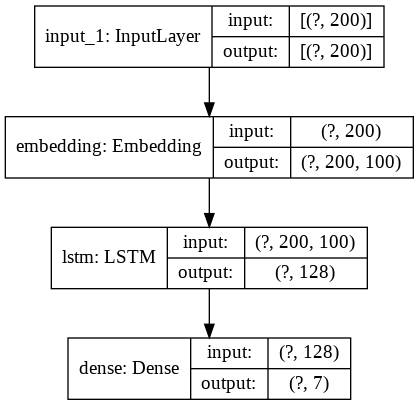

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=12, verbose=1, validation_split=0.2)


Epoch 1/12
13/13 [==============================] - 7s 568ms/step - loss: 0.4659 - acc: 0.0442 - val_loss: 0.4529 - val_acc: 0.0605
Epoch 2/12
13/13 [==============================] - 7s 570ms/step - loss: 0.4662 - acc: 0.0442 - val_loss: 0.4510 - val_acc: 0.0605
Epoch 3/12
13/13 [==============================] - 7s 573ms/step - loss: 0.4657 - acc: 0.0442 - val_loss: 0.4520 - val_acc: 0.0605
Epoch 4/12
13/13 [==============================] - 7s 570ms/step - loss: 0.4652 - acc: 0.0442 - val_loss: 0.4527 - val_acc: 0.0605
Epoch 5/12
13/13 [==============================] - 8s 579ms/step - loss: 0.4661 - acc: 0.0442 - val_loss: 0.4526 - val_acc: 0.0605
Epoch 6/12
13/13 [==============================] - 8s 608ms/step - loss: 0.4658 - acc: 0.0442 - val_loss: 0.4517 - val_acc: 0.0605
Epoch 7/12
13/13 [==============================] - 8s 590ms/step - loss: 0.4657 - acc: 0.0442 - val_loss: 0.4516 - val_acc: 0.0605
Epoch 8/12
13/13 [==============================] - 7s 575ms/step - loss: 0.

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

16/16 [==============================] - 1s 56ms/step - loss: 0.4776 - acc: 0.0524
Test Score: 0.4776325523853302
Test Accuracy: 0.052419353276491165


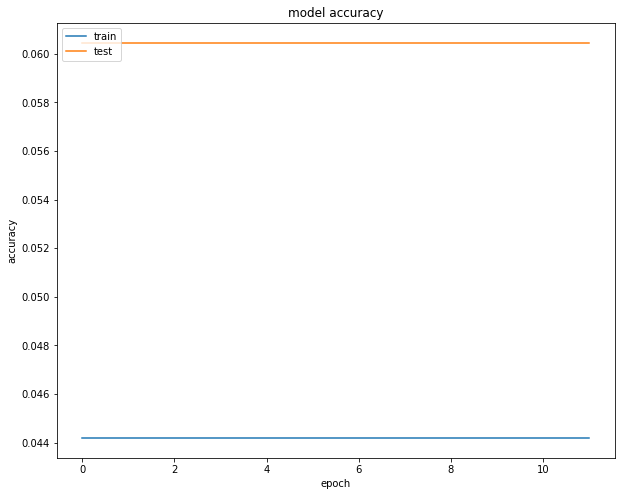

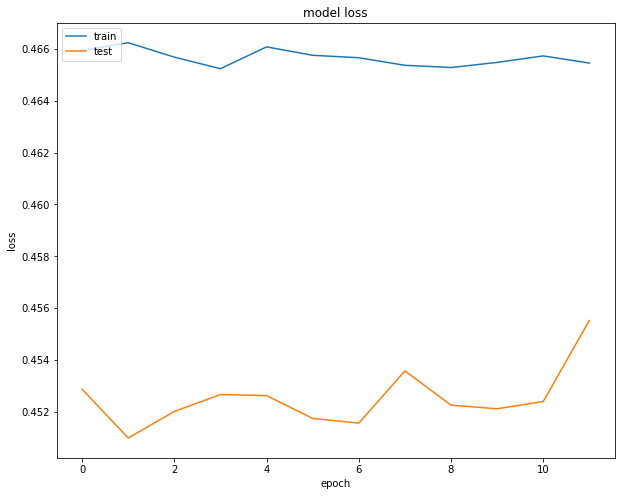

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()